# **Exploratory Data Analysis**

# Introduction

In this notebook, we will focus on evaluating the dataset and its characteristics from a Machine Learning perspective.

The main goal of this process is to enhance the model's performance by addressing data issues such as missing values, anomalies, and potential capture errors.

The validations we will perform include the following:

- **Data Types:** Validating data formats for consistency and compatibility.
- **Missing Data:** Identifying and addressing gaps in the dataset.
- **Descriptive Statistics:** Summarizing key statistical measures.
- **Outliers:** Detecting and analyzing unusual data points.
- **Capture Considerations:** Reviewing data collection methods for potential biases or errors.
- **Class Balance:** Evaluating the distribution of target classes.
- **Potential Correlation:** Assessing relationships between features.
- **Distribution Analysis:** Validating data distribution

## Load libraries and data

In [37]:
import pandas as pd
df = pd.read_csv('G:\Mi unidad\###_ ML Zoomcamp 2024\enape_db_formated.csv')

We're already familiar with the dataset, but I'll display it here for quick reference

In [2]:
df.head()

,resident_seq_number,sex,age,school_type,school_grade,finished_grade,em_hw_projects,em_tests,em_multimedia_evidence,em_class_participation,...,ap_depressed,ap_academic_desperation,ap_social_difficulty,ap_no_issues,economic_participation,work_hours,economic_consequences,state_number,period_type,period_number
0,1,male,13,public,primary,True,True,True,False,False,...,False,False,False,False,NaN,NaN,NaN,24,year,6.0
1,2,female,19,public,bachelors,True,True,True,False,False,...,False,False,False,False,studying_other,NaN,NaN,24,year,1.0
2,1,female,8,public,primary,True,True,True,False,False,...,False,True,False,False,NaN,NaN,NaN,22,year,2.0
3,1,male,27,private,bachelors,True,True,True,False,False,...,False,False,False,True,worked_one_hour,25.0,no_consequence,26,quadrimester,2.0
4,2,male,11,private,primary,True,True,True,False,False,...,False,False,False,True,NaN,NaN,NaN,18,year,5.0


In [3]:
df.shape

(19973, 42)

## Data Types

In [38]:
numerical = list(df.select_dtypes(include=['float64', 'int64']).columns)
categorical = list(df.select_dtypes(include=['object', 'category', 'string']).columns)
boolean = list(df.select_dtypes(include=['bool']).columns)

In [ ]:
print(numerical)
print(categorical)
print(boolean)

['resident_seq_number', 'age', 'help_hours', 'work_hours', 'state_number', 'period_number']
['sex', 'school_type', 'school_grade', 'expected_grade', 'economic_participation', 'economic_consequences', 'period_type']
['finished_grade', 'em_hw_projects', 'em_tests', 'em_multimedia_evidence', 'em_class_participation', 'em_class_work', 'em_class_attendance', 'em_other', 'em_no_evaluation', 'et_smartphone', 'et_laptop', 'et_desktop_pc', 'et_tablet', 'et_flat_screen', 'et_didactic_material', 'et_other', 'et_none', 'hr_mother', 'hr_father', 'hr_female_relative', 'hr_male_relative', 'hr_female_non_relative', 'hr_male_non_relative', 'hr_none', 'ap_stressed', 'ap_depressed', 'ap_academic_desperation', 'ap_social_difficulty', 'ap_no_issues']


"period_number" is a numerical value, but in our project, it is not a continuous variable. Instead, it is categorical, as it represents the grade period in which the student is enrolled. Therefore, we will convert it into a categorical or string type.

In [40]:
df['period_number'] = df['period_number'].astype('string')


In [41]:
df['period_number'].dtypes

string[python]

The same scenario goes for "state_number" as it represents the geographical state, nos a continuos value

In [42]:
df['state_number'] = df['state_number'].astype('string')

In [43]:
df['state_number'].dtypes

string[python]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19973 entries, 0 to 19972
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resident_seq_number      19973 non-null  int64  
 1   sex                      19973 non-null  object 
 2   age                      19973 non-null  int64  
 3   school_type              19973 non-null  object 
 4   school_grade             19973 non-null  object 
 5   finished_grade           19973 non-null  bool   
 6   em_hw_projects           19973 non-null  bool   
 7   em_tests                 19973 non-null  bool   
 8   em_multimedia_evidence   19973 non-null  bool   
 9   em_class_participation   19973 non-null  bool   
 10  em_class_work            19973 non-null  bool   
 11  em_class_attendance      19973 non-null  bool   
 12  em_other                 19973 non-null  bool   
 13  em_no_evaluation         19973 non-null  bool   
 14  et_smartphone         

At this point I think we have the correct data types, we'll proceed and if needed we can come back and recheck

## Missing Data

We'll try to avoud missing values and justify any replacements

### Initial validation

In [44]:
df.isnull().sum()[lambda x: x > 0]

help_hours                 8666
expected_grade             5545
economic_participation    10398
work_hours                17038
economic_consequences     17038
dtype: int64

### help_hours

The "help_hours" value indicates the amount of time the student received help. According to the survey documentation, this field is relevant for students aged between 3 and 17 years old, so it would be blank for those above this age range. Additionally, for students within this age range who provided no answer, we can assume no help was received. In both scenarios, null values can be replaced with zero.

In [45]:
df['help_hours'] = df['help_hours'].fillna(0)

### expected_grade

In the case of "expected_grade", we'll replace null values with "unknown"

In [46]:
df.groupby('expected_grade').size()

expected_grade
bachelors      11187
high_school      506
masters         1776
primary           27
secondary        173
tech_bacc        183
tech_school       14
univ_tech        205
unknown          357
dtype: int64

In [47]:
df['expected_grade'] = df['expected_grade'].fillna('unknown')

In [48]:
df.groupby('expected_grade').size()

expected_grade
bachelors      11187
high_school      506
masters         1776
primary           27
secondary        173
tech_bacc        183
tech_school       14
univ_tech        205
unknown         5902
dtype: int64

### economic_participation

According to the survey documentation, this field is relevant for students aged between 14 and 29 years old, so it will be blank for those below this age range. We can validate it as follows:

In [49]:
df[df['economic_participation'].isnull()].groupby('age').size()


age
3       32
4      362
5      851
6     1093
7     1007
8     1140
9     1110
10    1233
11    1119
12    1275
13    1176
dtype: int64

Therefore, we will replace null values with the category described as "Studying or in a different" (in the preprocessing phase, we filtered the records to include only enrolled students).

| Numeric Value | Description (in Spanish)                                               | Description (Translated)                                      | New Value              |
|---------------|------------------------------------------------------------------------|--------------------------------------------------------------|------------------------|
| 1             | trabajó por lo menos una hora (tenía trabajo pero no trabajó)?         | Worked at least one hour (had a job but didn't work)?         | worked_one_hour       |
| 2             | vendió o hizo algún producto para vender?                              | Sold or made a product to sell?                              | sold_product          |
| 3             | ayudó en las labores del campo, cría de animales, o en el negocio de un familiar o de otra persona? | Helped with farming, animal husbandry, or a family/other's business? | family_business_help |
| 4             | a cambio de un pago realizó otro tipo de actividad? (lavó o planchó ajeno, cuidó niños) | Performed other paid activity? (laundry, ironing, childcare) | paid_other_work       |
| 5             | estuvo de aprendiz o haciendo su servicio social?                      | Was an apprentice or doing community service?                | apprentice_service    |
| 6             | buscó trabajo?                                                        | Searched for a job?                                          | job_search            |
| 7             | Estudia o está en otra situación diferente a las anteriores            | Studying or in a different situation                         | studying_other        |
| b             | No sabe                                                  | Doesn't know                                           | unknown        |


In [50]:
df['economic_participation'] = df['economic_participation'].fillna('studying_other')

In [51]:
df.groupby('economic_participation').size()

economic_participation
apprentice_service        115
family_business_help      430
job_search                158
paid_other_work            19
sold_product               72
studying_other          16880
worked_one_hour          2299
dtype: int64

### work_hours

These features are also focused for students above 14 years, so we can check null distribution by age

In [52]:
df[df['work_hours'].isnull()].groupby('age').size()

age
3       32
4      362
5      851
6     1093
7     1007
8     1140
9     1110
10    1233
11    1119
12    1275
13    1176
14    1077
15    1043
16     836
17     801
18     745
19     465
20     422
21     409
22     327
23     212
24     131
25      71
26      34
27      31
28      18
29      18
dtype: int64

For cases above 14 years we can make the assumption that the lack of response is that there was no economic participation activities also, so we can replace null values with zero

In [53]:
df['work_hours'] = df['work_hours'].fillna(0)

In [54]:
df['work_hours'].isnull().sum()

0

### economic_consequences

We can use the same approach for economic consequences

In [55]:
df[df['economic_consequences'].isnull()].groupby('age').size()

age
3       32
4      362
5      851
6     1093
7     1007
8     1140
9     1110
10    1233
11    1119
12    1275
13    1176
14    1077
15    1043
16     836
17     801
18     745
19     465
20     422
21     409
22     327
23     212
24     131
25      71
26      34
27      31
28      18
29      18
dtype: int64

We'll use the `no_consequence` value

In [56]:
df.groupby('economic_consequences').size()

economic_consequences
allocate_income        274
economic_unsustain     160
education_stop         228
hire_replacement        44
income_decrease        645
no_consequence        1431
other_consequence       27
workload_increase      126
dtype: int64

In [57]:
df['economic_consequences'] = df['economic_consequences'].fillna('no_consequence')

In [58]:
df.groupby('economic_consequences').size()

economic_consequences
allocate_income         274
economic_unsustain      160
education_stop          228
hire_replacement         44
income_decrease         645
no_consequence        18469
other_consequence        27
workload_increase       126
dtype: int64

### Final Validation

In [59]:
df.isnull().sum()[lambda x: x > 0]

Series([], dtype: int64)

## Descriptive Statistics

### General

In [60]:
df.describe()

,resident_seq_number,age,help_hours,work_hours
count,19973.000000,19973.000000,19973.000000,19973.000000
mean,1.818555,13.468883,4.166675,4.092275
std,0.956192,5.555088,5.790704,11.756149
min,1.000000,3.000000,0.000000,0.000000
25%,1.000000,9.000000,0.000000,0.000000
50%,2.000000,13.000000,2.000000,0.000000
75%,2.000000,18.000000,6.000000,0.000000
max,10.000000,29.000000,99.000000,99.000000


In [61]:
df.shape[0]  # Total rows (instances) in the DataFrame

19973

We need to adjust the "98 and 99" values in help_hours and work_hours, as according to the survey documentation, they represent an unknown value. To avoid any bias or influence, we will replace these values with zero.

In [65]:
(df == 99).sum()[lambda x: x > 0]

help_hours    5
work_hours    2
dtype: int64

In [66]:
(df == 98).sum()[lambda x: x > 0]

help_hours    3
dtype: int64

There are only 10 records out of 19973 in this scenario, we can expect no impact

In [67]:
# Replace values in help_hours
df['help_hours'] = df['help_hours'].replace({98: 0, 99: 0})

# Replace values in work_hours
df['work_hours'] = df['work_hours'].replace({99: 0})


In [68]:
(df == 99).sum()[lambda x: x > 0]

Series([], dtype: int64)

In [69]:
(df == 98).sum()[lambda x: x > 0]

Series([], dtype: int64)

There are no more evident outliers, so we'll check descriptive statistics and generate distribution graphs by category type

### Graph function

In [150]:
import matplotlib.pyplot as plt

def plot_distribution(df, feature_list, title="Distribution Plot", columns=2, color='blue', row_height=4):

    print(f"\n  {title}")
    
    # General figure settings
    rows = -(-len(feature_list) // columns)  # Redondear hacia arriba
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(15, rows * row_height))
    
    # Validate 2D list
    axes = axes.flatten() if rows > 1 or columns > 1 else [axes]
    
    # Plot each variable
    for i, col in enumerate(feature_list):
        ax = axes[i]
        counts = df[col].value_counts().sort_index()
        counts.plot(kind='bar', ax=ax, color=color)
        
        # Set titles and labels
        ax.set_title(f"{col} Distribution", fontsize=10)
        ax.set_xlabel(col, fontsize=8)
        ax.set_ylabel("Frecuency", fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=8)
    
    # turn off unused spaces
    for j in range(len(feature_list), len(axes)):
        axes[j].axis('off')

    # adjust general figure
    plt.tight_layout()
    plt.show()

### Numerical features

In [132]:
numerical = list(df.select_dtypes(include=['float64', 'int64']).columns)
numerical


['resident_seq_number', 'age', 'help_hours', 'work_hours']

In [75]:
df.describe().round()

,resident_seq_number,age,help_hours,work_hours
count,19973.0,19973.0,19973.0,19973.0
mean,2.0,13.0,4.0,4.0
std,1.0,6.0,5.0,12.0
min,1.0,3.0,0.0,0.0
25%,1.0,9.0,0.0,0.0
50%,2.0,13.0,2.0,0.0
75%,2.0,18.0,6.0,0.0
max,10.0,29.0,60.0,60.0



  Distribution Plot


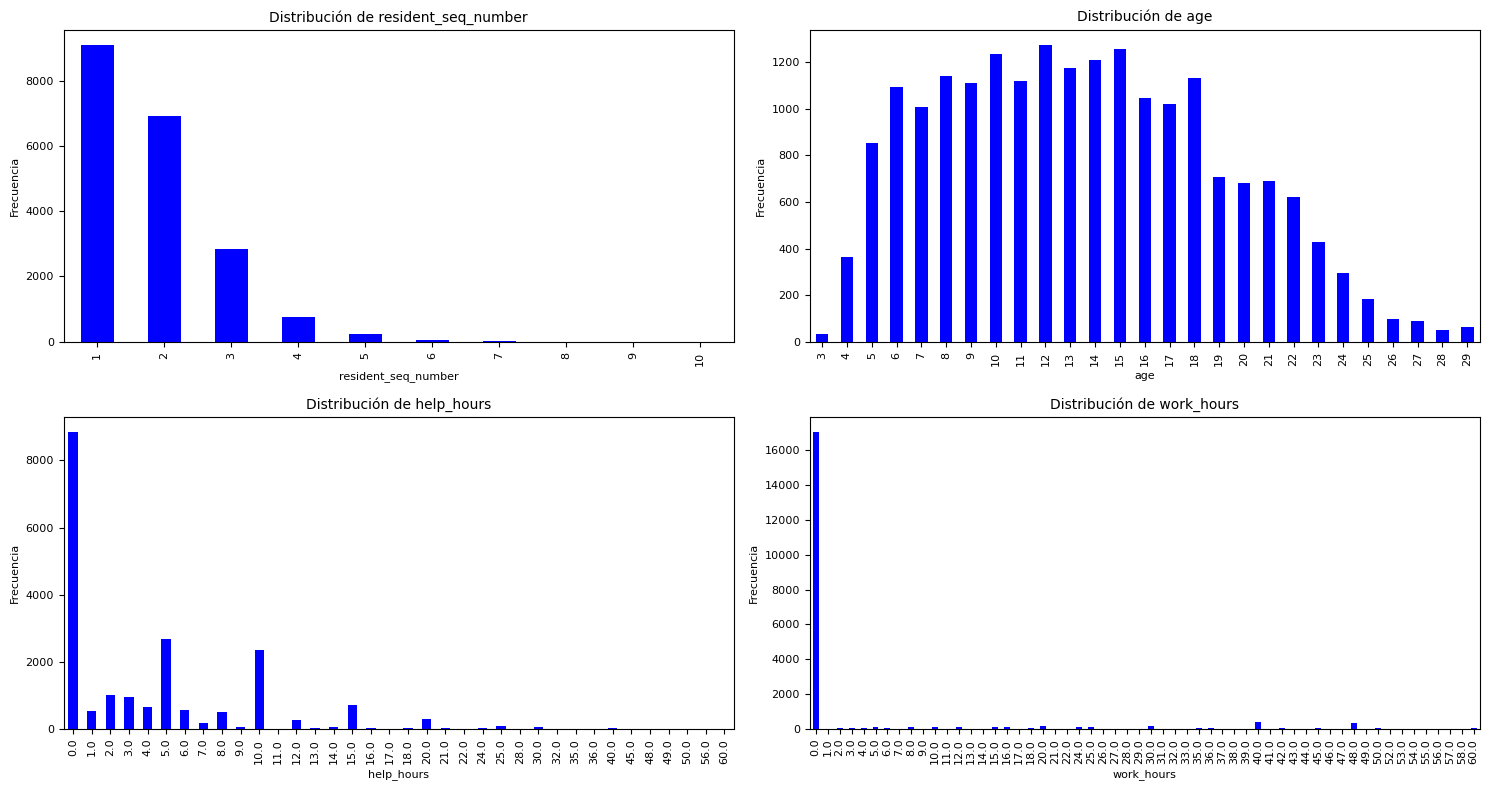

In [133]:
plot_distribution(df, feature_list=numerical, columns=2)

Numerical Features Highlights:

- `resident_seq_number` shows an expected pattern, as it is associated with family size, so it is anticipated that the value will be small.
- `age` shows a tendency toward ages between 6 and 15 years, which is also expected since it corresponds to elementary and middle school levels, which are mandatory by law in Mexico.
- `help_hours` and `work_hours` exhibit a known survey effect where people tend to select round numbers (recall bias). In both cases, the value "0" predominates because both survey questions are tied to a subset of the survey.
- This distributions indicate opportunities to develop a future model segmented by relevant features, `age` for example.

No changes required


This graph details the relationship between Age and School Grade

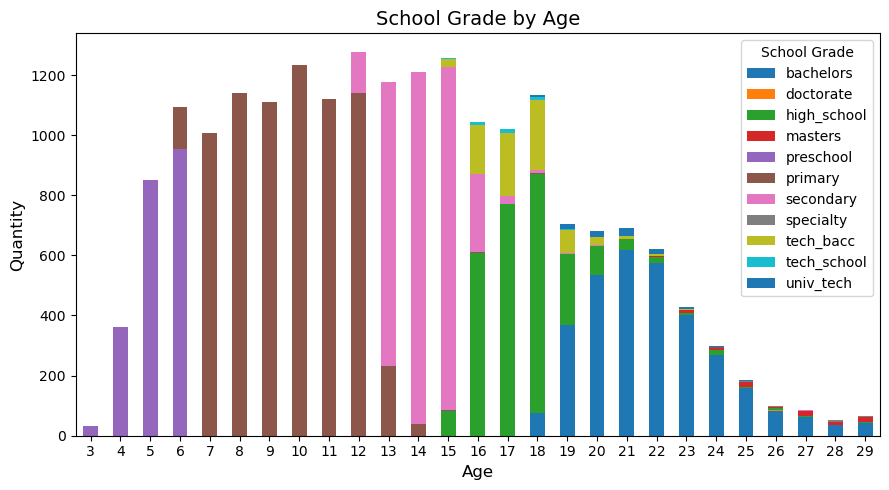

In [140]:
stacked_data = df.groupby(['age', 'school_grade']).size().unstack(fill_value=0)

stacked_data.plot(kind='bar', stacked=True, figsize=(9, 5))

plt.title('School Grade by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.legend(title='School Grade', fontsize=10)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Categorical Features

In [141]:
categorical = list(df.select_dtypes(include=['object', 'category', 'string']).columns)
categorical

['sex',
 'school_type',
 'school_grade',
 'expected_grade',
 'economic_participation',
 'economic_consequences',
 'state_number',
 'period_type',
 'period_number']

In [78]:
df.describe(include=['object'])

,sex,school_type,school_grade,expected_grade,economic_participation,economic_consequences,period_type
count,19973,19973,19973,19973,19973,19973,19973
unique,2,2,11,9,7,8,6
top,male,public,primary,bachelors,studying_other,no_consequence,year
freq,10231,17826,7172,11187,16880,18469,16109


In [79]:
df.describe(include=['string'])

,state_number,period_number
count,19973,19973
unique,32,14
top,29,3.0
freq,1128,4878



  Distribution Plot


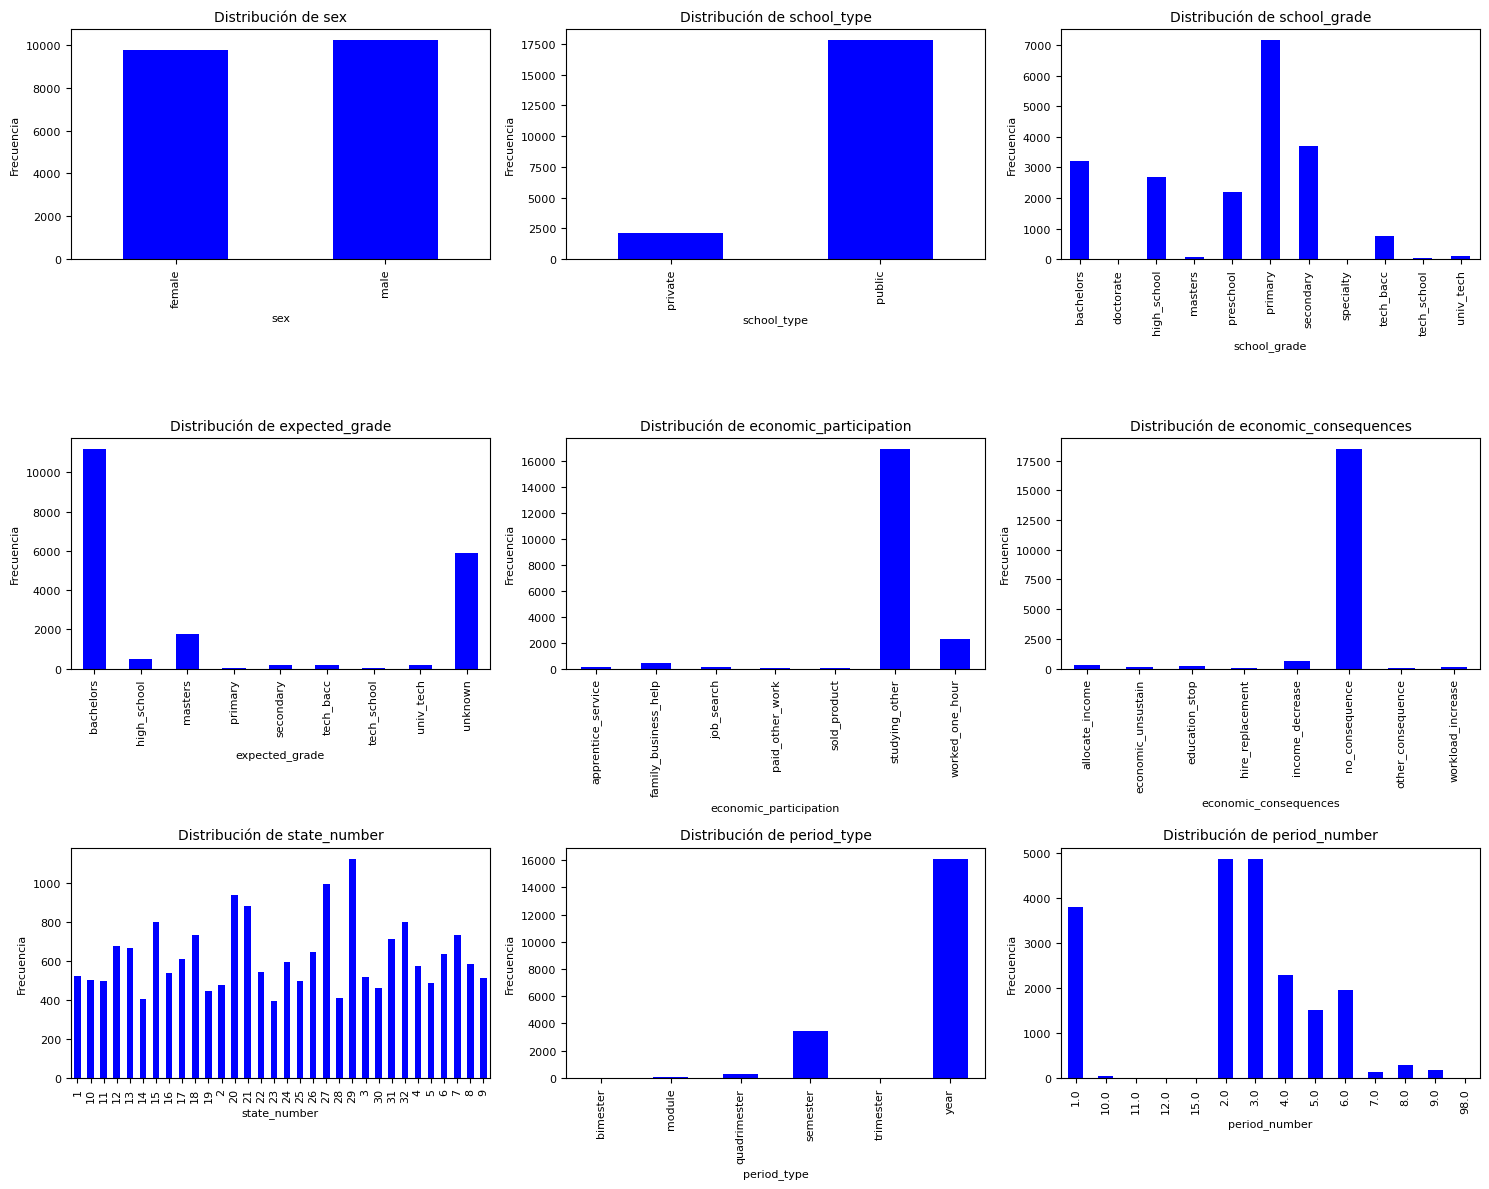

In [143]:
plot_distribution(df, feature_list=categorical, columns=3)

Categorical Features Highlights:

- I couldn't identify any new relevant issues. Some values are predominant, but these have already been discussed earlier.
- Additionally, `period_number` contains some "98" values. However, since there are no alternative values that could be applied and the number of such records is minimal, I don't see any significant potential impact. Therefore, we are keeping them as is.

In [147]:
df.period_number.value_counts()

3.0     4878
2.0     4863
1.0     3807
4.0     2292
6.0     1964
5.0     1518
8.0      278
9.0      168
7.0      143
10.0      49
11.0       5
12.0       4
98.0       3
15.0       1
Name: period_number, dtype: Int64

### Boolean features

In [148]:
boolean = list(df.select_dtypes(include=['bool']).columns)
boolean

['finished_grade',
 'em_hw_projects',
 'em_tests',
 'em_multimedia_evidence',
 'em_class_participation',
 'em_class_work',
 'em_class_attendance',
 'em_other',
 'em_no_evaluation',
 'et_smartphone',
 'et_laptop',
 'et_desktop_pc',
 'et_tablet',
 'et_flat_screen',
 'et_didactic_material',
 'et_other',
 'et_none',
 'hr_mother',
 'hr_father',
 'hr_female_relative',
 'hr_male_relative',
 'hr_female_non_relative',
 'hr_male_non_relative',
 'hr_none',
 'ap_stressed',
 'ap_depressed',
 'ap_academic_desperation',
 'ap_social_difficulty',
 'ap_no_issues']

Preffix reminder

- "em" stands for Evaluation Method
- "et" stands for Educational Tools used
- "hr" stands for Help Received
- "ap" stands for Academic Pressure.

In [80]:
df.describe(include=['bool'])

,finished_grade,em_hw_projects,em_tests,em_multimedia_evidence,em_class_participation,em_class_work,em_class_attendance,em_other,em_no_evaluation,et_smartphone,...,hr_female_relative,hr_male_relative,hr_female_non_relative,hr_male_non_relative,hr_none,ap_stressed,ap_depressed,ap_academic_desperation,ap_social_difficulty,ap_no_issues
count,19973,19973,19973,19973,19973,19973,19973,19973,19973,19973,...,19973,19973,19973,19973,19973,19973,19973,19973,19973,19973
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,True,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
freq,19585,17278,11247,13567,16064,10988,16990,19910,19709,13531,...,17942,19031,19849,19894,16852,14101,17792,15241,19036,10199



  Distribution Plot


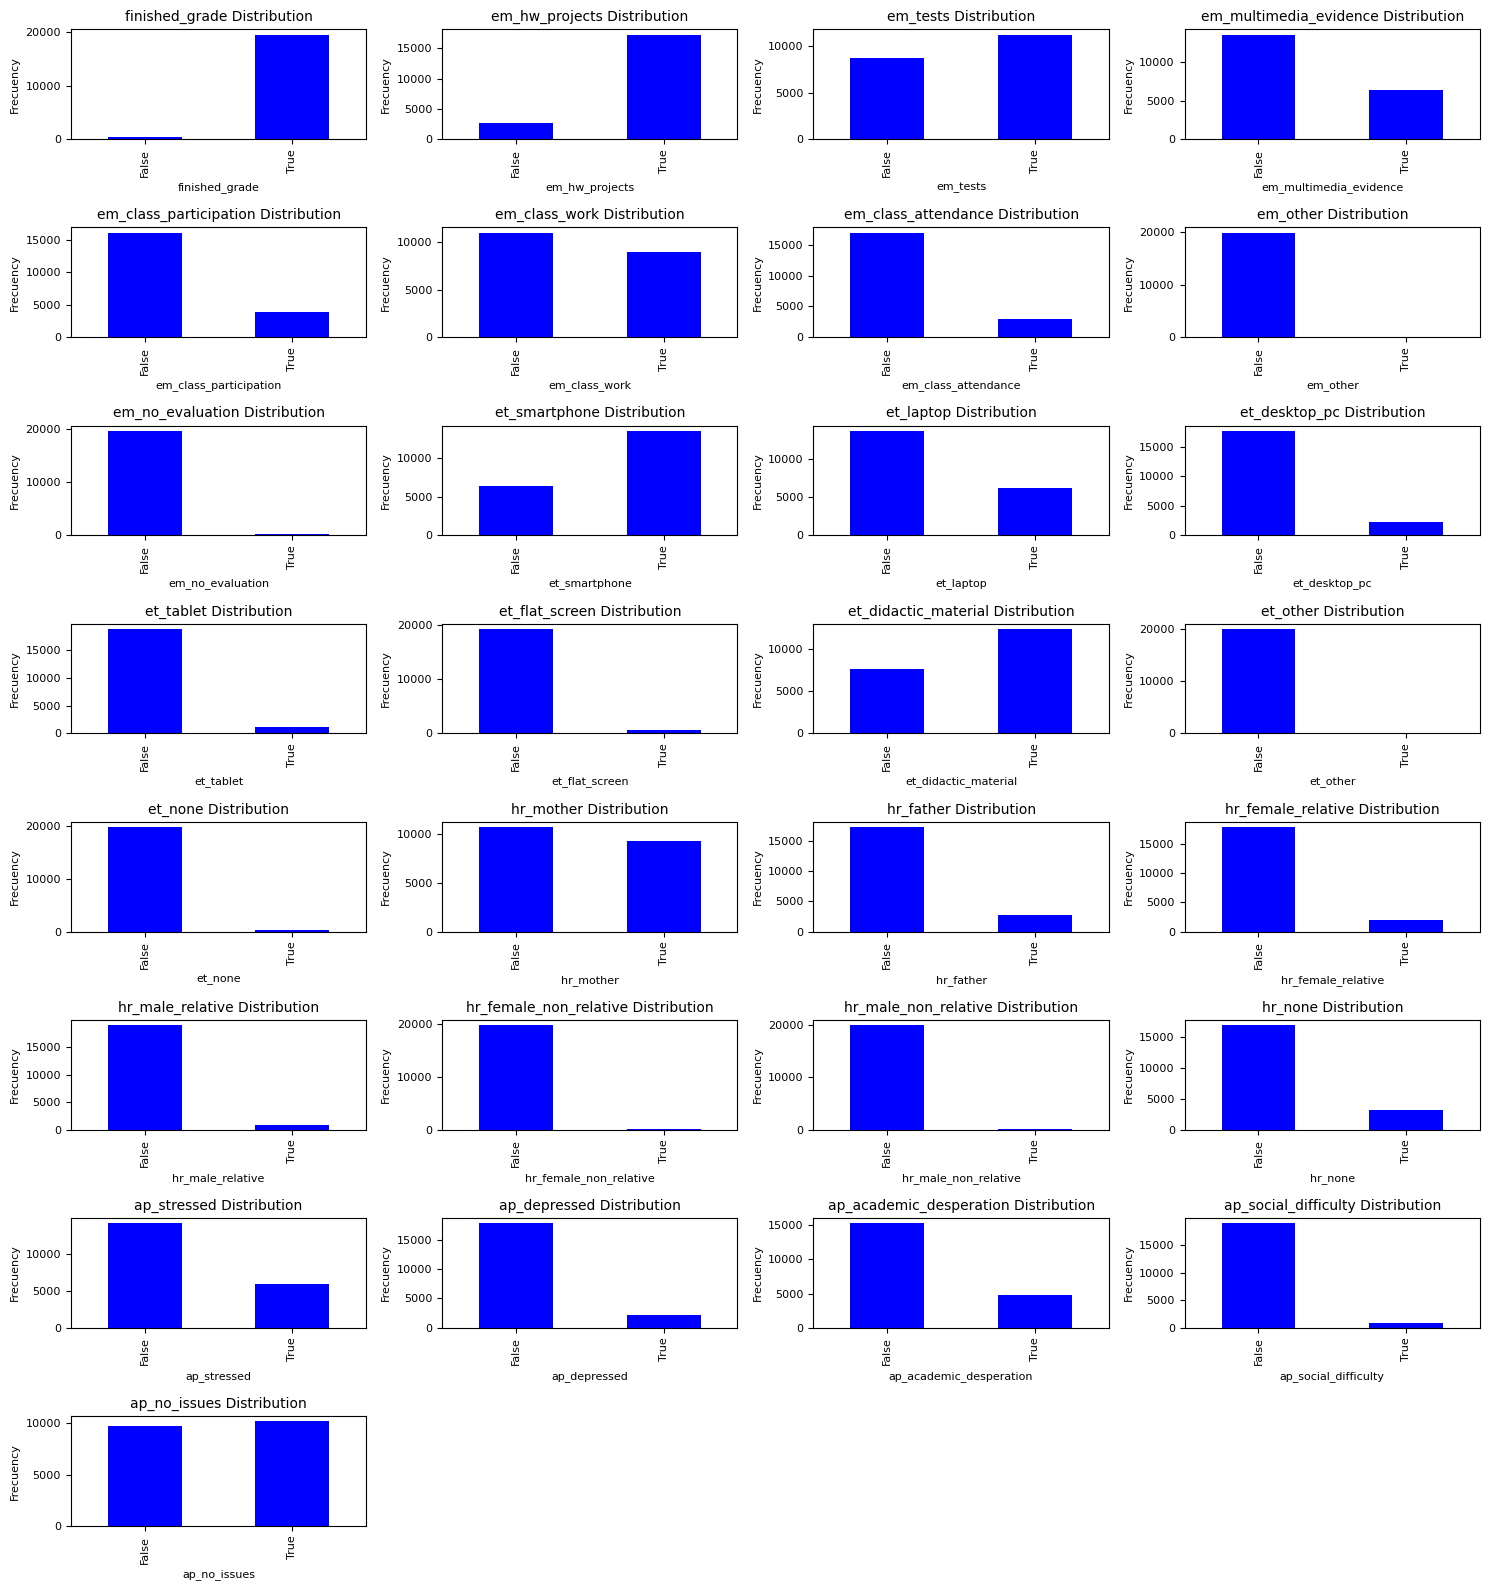

In [151]:
plot_distribution(df, feature_list=boolean, columns=4, row_height=2)

For these variables, the only case where the distribution provides valuable information is "finished grade," which is our target variable. Here, we can identify that **we have an imbalanced dataset**, as the "True" class predominates, meaning most students completed the school year.

We'll apply balancing techniques, but first we need to finish the EDA process

## Correlation

To enable interpretation and facilitate analysis, we will conduct our correlation analysis in three phases:

1. Analyze correlations for numerical and boolean features.
2. Across all data types, filtering for high correlation values: Focus on significant correlations by applying a threshold to filter out low values.
3. Correlation with our target variable `finished_grade`: Specifically analyze how each variable correlates with the target variable.

### Numerical Features

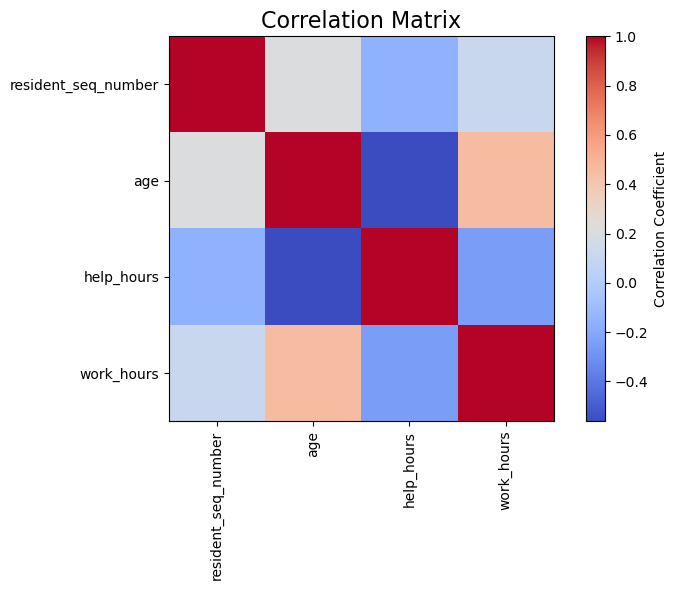

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = df[numerical].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

Comments:

There are no additional evident insights from the correlation analysis. However, we can identify the following:

- Significant positive correlation between `age` and `work_hours`:

This result is expected, as older individuals are more likely to engage in work activities. This aligns with the assumption that as people age, their responsibilities or opportunities to work increase.

- Significant negative correlation between `age` and `help_hours`:

This result is also expected, as younger individuals are more likely to require assistance (e.g., with homework or other tasks). As they grow older, their need for help may decrease due to increasing independence or experience.

### Boolean Features

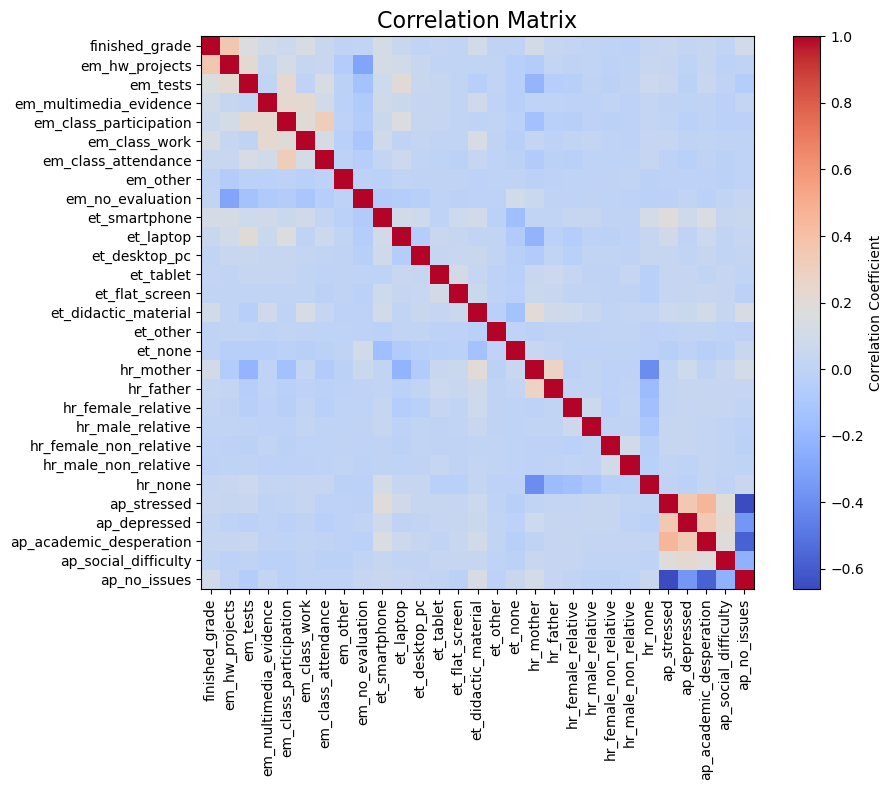

In [214]:
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = df[boolean].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

### Filter high correlation values

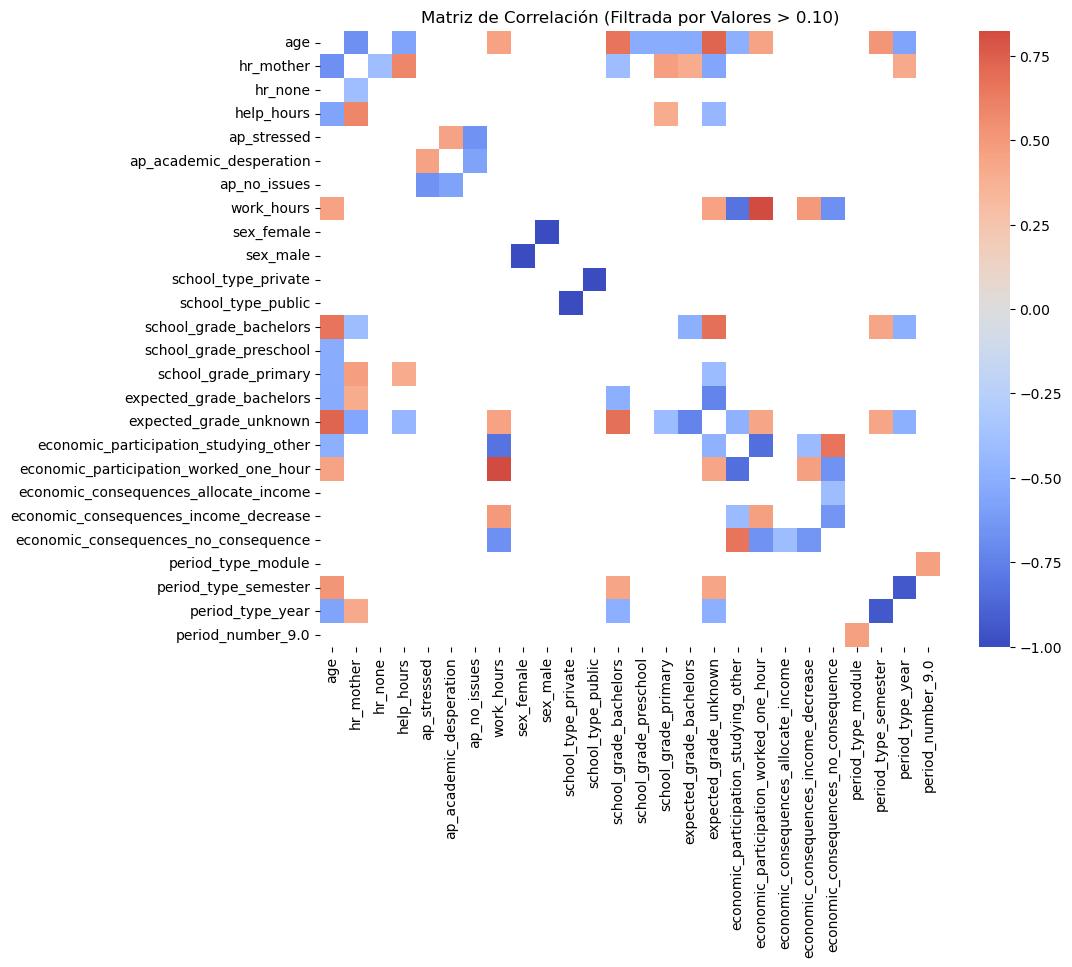

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generar dummies para variables categóricas
df_dummies = pd.get_dummies(df, drop_first=False)

# Calcular matriz de correlación
correlation_matrix = df_dummies.corr()

# Eliminar los valores de la diagonal principal (correlación consigo misma)
np.fill_diagonal(correlation_matrix.values, np.nan)

# Filtrar la matriz para valores mayores a 0.10
filtered_matrix = correlation_matrix.where(correlation_matrix.abs() > 0.4)

# Seleccionar solo las filas y columnas con al menos un valor significativo
significant_features = filtered_matrix.columns[filtered_matrix.abs().sum() > 0.4]
filtered_matrix = filtered_matrix.loc[significant_features, significant_features]

# Graficar el heatmap con valores filtrados (sin etiquetas)
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_matrix, annot=False, cmap='coolwarm', center=0, cbar=True)  # Cambiado annot a False
plt.title('Matriz de Correlación (Filtrada por Valores > 0.10)')
plt.show()


At this point, what really stands out to me here is that the `finished_grade` variable isn’t among those with high correlation. This could mean that school dropout is influenced by a combination of factors rather than any single one, which makes sense and fits perfectly with the goal of this project. Also, let’s not forget that the dataset is unbalanced, which can make it harder to spot these relationships. So in the next phase we'll focus on corelation regarding this one

### Correlation wit target variable

C:\Users\user\AppData\Local\Temp\ipykernel_6700\3109196886.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



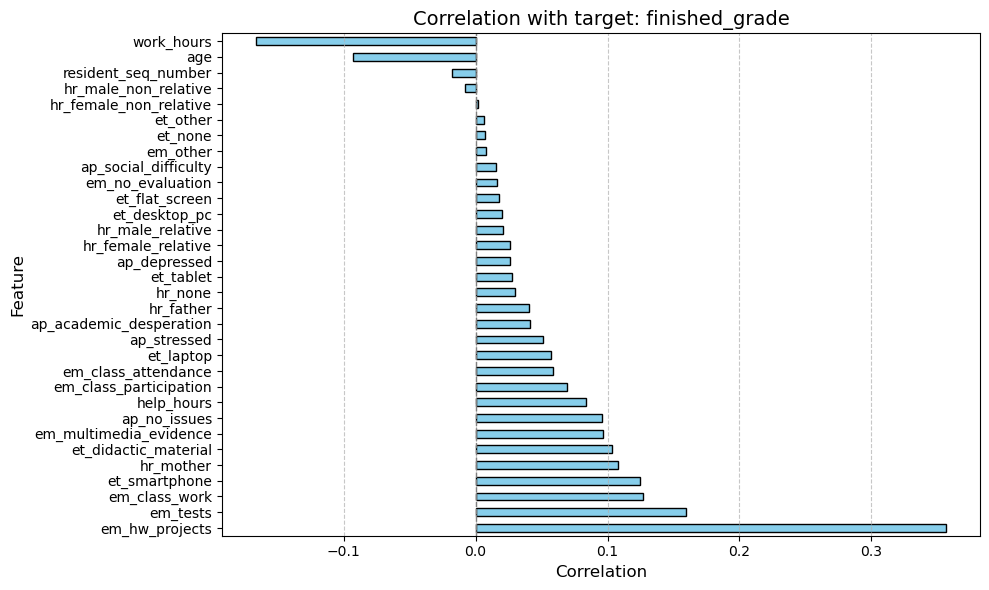

In [220]:
import matplotlib.pyplot as plt

# calculate correlation
correlacion_objetivo = df.corr()['finished_grade'].drop('finished_grade').sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 6))
correlacion_objetivo.plot(kind='barh', color='skyblue', edgecolor='black')

# grpah settings
plt.title('Correlation with target: finished_grade', fontsize=14)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # Línea en el eje 0
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# show plot
plt.show()

The variable `em_hw_projects` shows the highest positive correlation, indicating that participating in school projects is associated with a higher likelihood of completing the grade. On the other hand, `work_hours` and `age` have negative correlations, suggesting that working long hours or being older reduces the likelihood of finishing the grade. Overall, school completion appears to be influenced by a combination of multiple factors.

## EOF

In [144]:
# Export data to a pivot csv file
df.to_csv('G:\Mi unidad\###_ ML Zoomcamp 2024\enape_post_eda.csv', index=False)
